# 08 순환 신경망 Recurrent Neural Network, RNN

### 1) 순환 신경망

1. 순환 신경망 RNN

  입력과 출력을 시퀀스 단위로 처리하는 시퀀스 Sequence 모델

  은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징

- 셀 cell : 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드 (메모리 셀)

- 은닉 상태 hidden state : 메모리 셀이 출력층 방향 또는 다음 시점 t+1 자신에게 보내는 값

  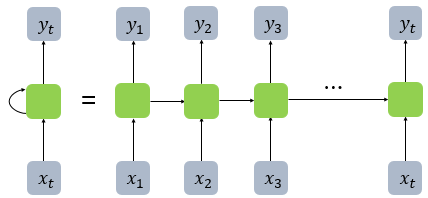

2. 케라스로 RNN 구현

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units, input_shape=(timesteps,input_dim)))
# hidden_units : 은닉 상태의 크기 정의
# timesteps : 입력 시퀀스의 길이
# input_dim : 입력의 크기
# return_sequences = True : 메모리 셀이 모든 시점에 대한 은닉 값 출력

3. 깊은 순환 신경망 Deep Recurrent Neural Network

다수의 은닉층을 가진 RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))

4. 양방향 순환 신경망

  과거 시점 만이 아닌 미래 시점 값까지 고려하여 문제 해결 ( 앞 시점 은닉상태와 뒤 시점 은닉상태를 전달 받는다.)


In [ ]:
from tensorflow.keras.models import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

### 2) 장단기 메모리 Long Short-Term Memory, LSTM

1. 바닐라 RNN의 한계

  장기 의존성 문제 : 비교적 짧은 시퀀스에서만 효과를 보인다. 시의이 길어질수록 정보가 충분히 뒤로 전달되지 못하는 현상이 발생한다.

2. 바닐라 RNN 내부 열어보기

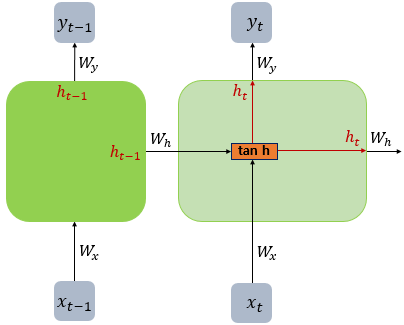

3. LSTM

  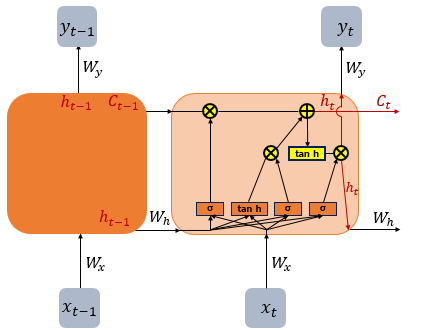

  전통적인 RNN의 단점을 보완한 장단기 메모리

  은닉층의 메모리 셀에 입력 게이트, 출력 게이트, 망각 게이트를 추가하여 불필요한 기억을 지우고, 기억해야 할 것들을 기억한다. (셀 상태 cell state 추가)

- 입력 게이트

  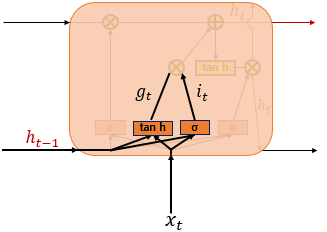

  현재 정보를 기억하기 위한 게이트

- 삭제 게이트

  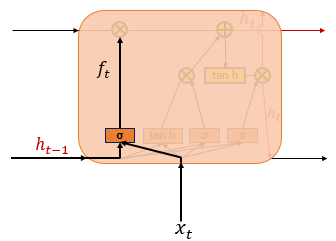

  기억을 삭제하기 위한 게이트

- 셀 상태

  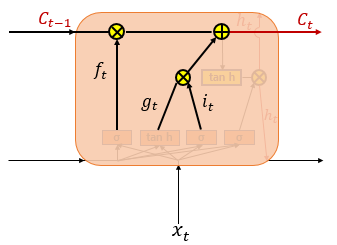

  삭제 게이트 : 이전 시점의 입력을 얼마나 반영할지

 입력 게이트 : 현재 시점의 입력을 얼마나지 반영할지

- 출력 게이트와 은닉 상태

  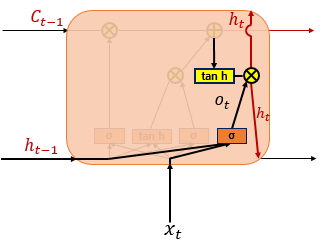

  셀 상태 값이 하이퍼볼릭 탄젠트 함수를 지나 -1과 1 사이 값이 되고, 해당 값은 출력 게이트의 값과 연산되며 값이 걸러지는 효과 발생하여 은닉 상태가 된다. 은닉 상태의 값은 또한 출력층으로 향한다.

### 3) 게이트 순환 유닛 Gated Recurrent Unit, GRU

1. GRU

  LSTM과 성능은 유사하지만 단순한 모델

  업데이트 게이트와 리셋 게이트만 존재 (학습 속도 빠르다.)

  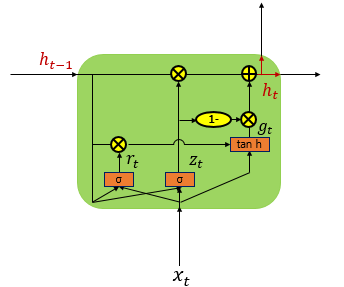

2. 케라스에서 GRU

In [ ]:
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

### 4) 케라스의 SimpleRNN과 LSTM 이해

1. 임의의 입력 생성


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
# RNN은 3차원 텐서를 입력 받는다.-> 배치 크기 1 추가
train_X = np.array(train_X, dtype=np.float32)

2. SimpleRNN 이해하기

  return_sequences : 모든 은닉 상태 출력 여부
  
  return_state : 마지막 은닉 상태 출력 여부

In [14]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.6677464  -0.9984168   0.8867451 ]
  [ 0.52577615 -0.96249104  0.96503824]
  [ 0.605524   -0.84989196  0.97457045]
  [ 0.23237516 -0.06457966  0.9599168 ]]], shape: (1, 4, 3)
last hidden state : [[ 0.23237516 -0.06457966  0.9599168 ]], shape: (1, 3)


3. LSTM 이해하기

In [15]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.5977863  -0.2099251   0.01307191]
  [-0.6805807  -0.11494444  0.01064529]
  [-0.41034988 -0.1657094  -0.03337071]
  [-0.6385347  -0.04112729  0.0408762 ]]], shape: (1, 4, 3)
last hidden state : [[-0.6385347  -0.04112729  0.0408762 ]], shape: (1, 3)
last cell state : [[-0.9264263  -0.23042524  0.08423951]], shape: (1, 3)


3. Bidirectional(LSTM) 이해하기

  정방향, 역방향 은닉 상태, 셀 상태 출력 가능

In [18]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


### 5) RNN 언어 모델 Recurrent Neural Network Language Model, RNNLM

- n-gram과 NNLM : 고정된 개수의 단어만을 입력으로 받는다. 

- RNNLM : 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 한다.

  교사 강요 teacher forcing : 테스트 과정에서 t 시점의 출력이 t+q 시점의 입력으로 사용되는 RNN 모델을 훈련 시킬 때 사용하는 훈련 기법


### 6) RNN을 이용한 텍스트 생성

1. RNN을 이용한 텍스트 생성

- 데이터에 대한 이해와 전처리

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1 # 패딩 고려해서 +1

sequences = list()
for line in text.split('\n'): # 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1] # 한 단어씩 더해가며 예측
        sequences.append(sequence)

max_len = max(len(l) for l in sequences)

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre') # 패딩

sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1] # 마지막 단어는 훈련 데이터

y = to_categorical(y, num_classes=vocab_size) # 원-핫 인코딩

- 모델 설계

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.5229 - accuracy: 0.0909 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.5061 - accuracy: 0.1818 - 5ms/epoch - 5ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4900 - accuracy: 0.1818 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4744 - accuracy: 0.1818 - 5ms/epoch - 5ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4592 - accuracy: 0.1818 - 5ms/epoch - 5ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4443 - accuracy: 0.2727 - 5ms/epoch - 5ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4295 - accuracy: 0.4545 - 6ms/epoch - 6ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4147 - accuracy: 0.4545 - 7ms/epoch - 7ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3998 - accuracy: 0.4545 - 7ms/epoch - 7ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3845 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3689 - accuracy: 0.4545 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3528 - accuracy: 0.4545 - 8ms/epoch - 8ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3362 - accuracy: 0.4545 - 4ms/e

In [21]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


2. LSTM을 이용하여 텍스트 생성

- 데이터 이해와 전처리

  뉴욕 타임즈 기사 제목 데이터 : ArticlesApril2018.csv

  https://www.kaggle.com/aashita/nyt-comments

In [22]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from google.colab import files
files.upload()

Saving ArticlesApril2018.csv to ArticlesApril2018.csv


{'ArticlesApril2018.csv': b'articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL\n5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders\xe2\x80\x99 Settlement Offer: $1 and a Meeting With Goodell,"[\'Workplace Hazards and Violations\', \'Football\', \'Cheerleaders\', \'Discrimination\', \'Sexual Harassment\', \'National Football League\', \'Davis, Bailey\', \'Goodell, Roger\']",68,Sports,0,2018-04-24 17:16:49,Pro Football,"\xe2\x80\x9cI understand that they could meet with us, patronize us and do nothing in the end,\xe2\x80\x9d their lawyer says.",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/football/nfl-cheerleaders.html\n5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.,"[\'Environmental Protection Agency\', \'Pruitt, Scott\', \'United States Politics and Government\',

In [23]:
df = pd.read_csv('/content/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [26]:
headline = [] # 헤드라인의 값들을 리스트로 저장
headline.extend(list(df.headline.values)) 

In [27]:
headline = [word for word in headline if word != "Unknown"] # Unknown 제거

In [28]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1

In [30]:
sequences = list()

for sentence in preprocessed_headline:
    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

max_len = max(len(l) for l in sequences)
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

y = to_categorical(y, num_classes=vocab_size)

- 모델 설계

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 15s - loss: 7.6298 - accuracy: 0.0283 - 15s/epoch - 61ms/step
Epoch 2/200
244/244 - 8s - loss: 7.1104 - accuracy: 0.0299 - 8s/epoch - 31ms/step
Epoch 3/200
244/244 - 8s - loss: 6.9746 - accuracy: 0.0354 - 8s/epoch - 32ms/step
Epoch 4/200
244/244 - 11s - loss: 6.8492 - accuracy: 0.0429 - 11s/epoch - 46ms/step
Epoch 5/200
244/244 - 8s - loss: 6.7048 - accuracy: 0.0419 - 8s/epoch - 34ms/step
Epoch 6/200
244/244 - 8s - loss: 6.5449 - accuracy: 0.0449 - 8s/epoch - 31ms/step
Epoch 7/200
244/244 - 11s - loss: 6.3657 - accuracy: 0.0543 - 11s/epoch - 44ms/step
Epoch 8/200
244/244 - 8s - loss: 6.1749 - accuracy: 0.0579 - 8s/epoch - 31ms/step
Epoch 9/200
244/244 - 8s - loss: 5.9846 - accuracy: 0.0620 - 8s/epoch - 31ms/step
Epoch 10/200
244/244 - 8s - loss: 5.7979 - accuracy: 0.0672 - 8s/epoch - 31ms/step
Epoch 11/200
244/244 - 8s - loss: 5.6235 - accuracy: 0.0718 - 8s/epoch - 31ms/step
Epoch 12/200
244/244 - 8s - loss: 5.4621 - accuracy: 0.0733 - 8s/epoch - 31ms/step
Epoch 1

In [32]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

print(sentence_generation(model, tokenizer, 'i', 10))

i disapprove of school vouchers can i still apply for them


### 7) 문자 단위 RNN (Char RNN)

1. 문자 단위 RNN 언어 모델 

  임베딩 층을 사용하지 않는다.

- 데이터 이해와 전처리

  이상한 나라의 앨리스 Alice's Adventures in Wonderland 데이터

  http://www.gutenberg.org/files/11/11-0.txt

In [39]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f:
    sentence = sentence.strip() # strip()으로 문자열 앞, 뒤 \r, \n 제거
    sentence = sentence.lower() # 소문자화
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0: # 빈 문자열 제거
        sentences.append(sentence) 
f.close()

total_data = ' '.join(sentences)
total_data

'the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org. if you are not located in the united states, you will have to check the laws of the country where you are located before using this ebook. title: alices adventures in wonderland author: lewis carroll release date: january, 1991 [ebook #11] [most recently updated: october 12, 2020] language: english character set encoding: utf-8 produced by: arthur dibianca and david widger *** start of the project gutenberg ebook alices adventures in wonderland *** [illustration] alices adventures in wonderland by lewis carroll the millennium fulcrum edition 3.0 contents chapter i.     down the rabbit-hole chapter ii.    th

In [40]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드 
# URL로 표시된 네트워크 객체(URL 주소의 문서)를 로컬 파일로 저장
# 튜플(filename, headers)로 반환
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f:
    sentence = sentence.strip() # strip()으로 문자열 앞, 뒤 \r, \n 제거
    sentence = sentence.lower() # 소문자화
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0: # 빈 문자열 제거
        sentences.append(sentence) 
f.close()

total_data = ' '.join(sentences)

char_vocab = sorted(list(set(total_data))) # 중복 제거 -> 문자만 남긴다.
vocab_size = len(char_vocab)

# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))

index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))

In [43]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

- 모델 생성

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

hidden_units = 256

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax'))) # 다중 회귀 -> 소프트 맥스

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)
result = sentence_generation(model, 100)
print(result)

Epoch 1/80
84/84 - 46s - loss: 3.0654 - accuracy: 0.1851 - 46s/epoch - 543ms/step
Epoch 2/80
84/84 - 43s - loss: 2.7518 - accuracy: 0.2437 - 43s/epoch - 515ms/step
Epoch 3/80
84/84 - 42s - loss: 2.4182 - accuracy: 0.3232 - 42s/epoch - 495ms/step
Epoch 4/80
84/84 - 41s - loss: 2.2835 - accuracy: 0.3498 - 41s/epoch - 493ms/step
Epoch 5/80
84/84 - 41s - loss: 2.1848 - accuracy: 0.3761 - 41s/epoch - 493ms/step
Epoch 6/80
84/84 - 41s - loss: 2.1062 - accuracy: 0.3944 - 41s/epoch - 488ms/step
Epoch 7/80
84/84 - 42s - loss: 2.0404 - accuracy: 0.4109 - 42s/epoch - 499ms/step
Epoch 8/80
84/84 - 42s - loss: 1.9835 - accuracy: 0.4267 - 42s/epoch - 497ms/step
Epoch 9/80
84/84 - 41s - loss: 1.9333 - accuracy: 0.4399 - 41s/epoch - 490ms/step
Epoch 10/80
84/84 - 42s - loss: 1.8880 - accuracy: 0.4518 - 42s/epoch - 495ms/step
Epoch 11/80
84/84 - 41s - loss: 1.8459 - accuracy: 0.4642 - 41s/epoch - 490ms/step
Epoch 12/80
84/84 - 41s - loss: 1.8042 - accuracy: 0.4759 - 41s/epoch - 489ms/step
Epoch 13/80
8

2. 다 대 일 구조 RNN도 생성 가능